<a href="https://colab.research.google.com/github/LestyMV/Final-assignment---CO2-emissions/blob/main/Final_assignment_CO2_emissions_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.** Which countries are making the biggest strides in decreasing CO2 output? 

You'll need to find the relative CO2 output for each country to be able to calculate this. But countries can have growing and shrinking populations too, so it's probably a good idea to take this into account as well.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly


In [ ]:
# Make a usable dataframe of all dataframes
base_url = 'https://raw.githubusercontent.com/LestyMV/Final-assignment---CO2-emissions/main/'

# Import urls
url_co2 = f'{base_url}annual-co-emissions-by-region.csv'
url_gdp = f'{base_url}gdp-per-capita-maddison-2020.csv'
url_food = f'{base_url}global-food.csv'
url_pov = f'{base_url}the-share-and-number-of-people-living-in-extreme-poverty.csv'
url_hdi = f'{base_url}human-development-index.csv'
url_energy = f'{base_url}energy-consumption-by-source-and-country.csv'
url_pop_dens = f'{base_url}population-density-vs-prosperity.csv'
url_agri_land = f'{base_url}share-of-land-area-used-for-agriculture.csv'
url_industry = f'{base_url}industry-share-of-total-emplyoment.csv'
url_urban_rural = f'{base_url}urban-and-rural-population.csv'
url_gini =  f'{base_url}economic-inequality-gini-index.csv'
url_agri_out = f'{base_url}agricultural-output-dollars.csv'
url_gni = f'{base_url}gross-national-income-per-capita.csv'
url_energy_price = f'{base_url}levelized-cost-of-energy.csv'



In [ ]:
# Read urls
df_co2 = pd.read_csv(url_co2)
df_gdp = pd.read_csv(url_gdp)
df_food = pd.read_csv(url_food)
df_pov = pd.read_csv(url_pov)
df_hdi = pd.read_csv(url_hdi)
df_energy = pd.read_csv(url_energy)
df_density = pd.read_csv(url_pop_dens)
df_agri_land = pd.read_csv(url_agri_land)
df_industry = pd.read_csv(url_industry)
df_urban_rural = pd.read_csv(url_urban_rural)
df_gini = pd.read_csv(url_gini)
df_agri_out = pd.read_csv(url_agri_out)
df_gni = pd.read_csv(url_gni)
df_energy_price = pd.read_csv(url_energy_price)

In [ ]:
# Rename columns
df_co2 = df_co2.rename(columns = {'Entity':'Country', 
                                  'Annual CO₂ emissions (zero filled)': 'Annual CO₂ emissions (t/py)'})
df_gdp = df_gdp.rename(columns = {'Entity':'Country', 
                                  'GDP per capita': 'GDP pc'})
df_food = df_food.rename(columns = {'Food supply (kcal per capita per day)': 'Food supply (kcal/pc/pd)'})
df_pov = df_pov.rename(columns = {'Entity':'Country', 
                                  '$2.15 a day - share of population below poverty line': 'Share of pop < poverty line'})
df_hdi = df_hdi.rename(columns = {'Entity':'Country', 
                                  'Human Development Index': 'HDI'})
df_energy = df_energy.rename(columns = {'Entity':'Country', 
                                        'Geo Biomass Other - TWh (zero filled)': 'Biomass TWh', 
                                        'Biofuels Consumption - TWh - Total (zero filled)': 'Biofuels TWh', 
                                        'Solar Consumption - TWh (zero filled)': 'Solar TWh', 
                                        'Wind Consumption - TWh (zero filled)': 'Wind TWh', 
                                        'Hydro Consumption - TWh (zero filled)': 'Hydro TWh', 
                                        'Nuclear Consumption - TWh (zero filled)': 'Nuclear TWh', 
                                        'Gas Consumption - TWh (zero filled)': 'Gas TWh', 
                                        'Coal Consumption - TWh (zero filled)': 'Coal TWh', 
                                        'Oil Consumption - TWh (zero filled)': 'Oil TWh'})
df_density = df_density.rename(columns = {'Entity':'Country'})
df_agri_land = df_agri_land.rename(columns = {'Entity':'Country'})
df_industry = df_industry.rename(columns = {'Entity':'Country', 
                                            'Industry as % of total employment -- ILO modelled estimates, May 2017': 'Industry (% of total employment)'})
df_urban_rural = df_urban_rural.rename(columns = {'Entity':'Country'})
df_gini = df_gini.rename(columns = {'Entity':'Country', 
                                    'Gini coefficient': 'Gini'})
df_agri_out = df_agri_out.rename(columns = {'Entity':'Country', 
                                            'output_quantity': 'Agri output $'})
df_gni = df_gni.rename(columns = {'Entity':'Country', 
                                  'GNI per capita, PPP (constant 2017 international $)': 'GNI'})
df_energy_price = df_energy_price.rename(columns = {'Bioenergy levelized cost of energy': 'Bioenergy', 
                                                    'Geothermal levelized cost of energy': 'Geothermal energy', 
                                                    'Offshore wind levelized cost of energy': 'Offshore wind power', 
                                                    'Solar photovoltaic levelized cost of energy': 'Solar photovoltaic power', 
                                                    'Concentrated solar power levelized cost of energy': 'Concentrated solar power', 
                                                    'Hydropower levelized cost of energy': 'Hydropower', 
                                                    'Onshore wind levelized cost of energy': 'Onshore wind power'})

In [ ]:
# Recalculate columns
df_urban_rural['Total population'] = df_urban_rural['Urban population'] + df_urban_rural['Rural population']
df_urban_rural['Urban (% of total)'] = df_urban_rural['Urban population'] / df_urban_rural['Total population'] * 100
df_urban_rural['Rural (% of total)'] = df_urban_rural['Rural population'] / df_urban_rural['Total population'] * 100
df_energy['Renewable TWh'] = df_energy['Biomass TWh'] + df_energy['Biofuels TWh'] + df_energy['Solar TWh'] + df_energy['Wind TWh'] + df_energy['Hydro TWh']
df_energy['Fossil TWh'] = df_energy['Gas TWh'] + df_energy['Coal TWh'] + df_energy['Oil TWh']
df_co2['Annual CO₂ emissions (kg/py)'] = df_co2['Annual CO₂ emissions (t/py)'] * 1000

In [ ]:
# Merge two dataframes into one dataframe (df_co2 for co2 emissions and df_food for population)
df_list = [df_co2, df_food]
df_co2_1 = df_list[0]
for df_ in df_list[1:]:
    df_co2_1 = df_co2_1.merge(df_, on=['Country', 'Year'])

In [ ]:
# Remove rows that have zero as values and calculate emission per capita (to account for the growing or shrinking population)
df_co2_1['Annual CO₂ emissions (t/py/pc)'] = df_co2_1['Annual CO₂ emissions (t/py)'] / df_co2_1['Population']
df_co2_1 = df_co2_1[(df_co2_1['Annual CO₂ emissions (t/py/pc)'] > 0)]
display (df_co2_1)



,Country,Code,Year,Annual CO₂ emissions (t/py),Annual CO₂ emissions (kg/py),Product,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),...,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal/pc/pd),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day),Annual CO₂ emissions (t/py/pc)
0,Afghanistan,AFG,1961,490798.0,4.907980e+08,NaN,8790140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3054.9053,86.492840,38.209236,0.055835
1,Afghanistan,AFG,1962,688594.0,6.885940e+08,NaN,8969055,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2973.2468,84.580055,38.335213,0.076774
2,Afghanistan,AFG,1963,706736.0,7.067360e+08,NaN,9157463,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2751.7795,78.657250,39.338820,0.077176
3,Afghanistan,AFG,1964,838551.0,8.385510e+08,NaN,9355510,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3013.4424,85.198880,39.747234,0.089632
4,Afghanistan,AFG,1965,1006917.0,1.006917e+09,NaN,9565154,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3017.7600,85.612100,40.560085,0.105269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10131,Zimbabwe,ZWE,2015,12254954.0,1.225495e+10,NaN,14154937,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1872.9144,42.347970,55.084568,0.865772
10132,Zimbabwe,ZWE,2016,10533453.0,1.053345e+10,NaN,14452705,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1899.7627,42.004463,58.332520,0.728822
10133,Zimbabwe,ZWE,2017,9596071.0,9.596071e+09,NaN,14751101,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1797.1061,42.225240,50.178062,0.650533
10134,Zimbabwe,ZWE,2018,11795478.0,1.179548e+10,NaN,15052191,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1798.6170,41.094800,50.533940,0.783639


In [ ]:
# Make list of values containing strings to discard from dataframe (e.g. Continents, Income related, Territories)
# print(df_co2_1.Country.unique().tolist())
values_to_remove = ['Africa', 
                    'Europe', 
                    'European Union (27)', 
                    'French Polynesia', 
                    'High-income countries', 
                    'Macao', 
                    'Low-income countries', 
                    'Lower-middle-income countries', 
                    'Upper-middle-income countries', 
                    'World', 
                    'Oceania', 
                    'Asia', 
                    'North America', 
                    'South America']
df_co2_1 = df_co2_1[~df_co2_1.Country.str.match('|'.join(values_to_remove))]

In [ ]:
# Transform the dataframe to set years as columns
df_co2_1 = df_co2_1.set_index(['Country', 'Year'])['Annual CO₂ emissions (t/py/pc)'].unstack()

In [ ]:
# Check for missing values (there were missing values and they were dropped)
nan_count_co2 = df_co2_1.isna().sum()
print(f'The number of missing values in df_co2_1 is: {nan_count_co2}')
# Drop rows with missing values
df_co2_1 = df_co2_1.dropna()


The number of missing values in df_co2_1 is: Year
1961    42
1962    42
1963    42
1964    41
1965    41
1966    41
1967    41
1968    41
1969    41
1970    41
1971    40
1972    39
1973    39
1974    39
1975    39
1976    39
1977    39
1978    39
1979    39
1980    39
1981    38
1982    38
1983    38
1984    38
1985    38
1986    38
1987    38
1988    38
1989    38
1990    36
1991    35
1992    16
1993    13
1994    13
1995    13
1996    13
1997    13
1998    13
1999    13
2000    11
2001    11
2002    10
2003    10
2004    10
2005    10
2006     8
2007     8
2008     8
2009     8
2010     4
2011     4
2012     3
2013     3
2014     2
2015     2
2016     2
2017     2
2018     2
2019     2
dtype: int64


In [ ]:
print('Dataframe with relevant values for calculating relative CO2 output (df_co2_1)')
display(df_co2_1)

Dataframe with relevant values for calculating relative CO2 output (df_co2_1)


Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.055835,0.076774,0.077176,0.089632,0.105269,0.111534,0.128058,0.119381,0.089688,0.155343,...,0.296733,0.404740,0.329389,0.293283,0.280299,0.290076,0.261795,0.276852,0.294876,0.293401
Albania,1.287979,1.346509,1.101845,1.033696,1.080787,1.231268,1.255597,1.397973,1.434334,1.608566,...,1.642020,1.832230,1.676950,1.831462,2.080253,1.634750,1.607731,1.932425,1.732364,1.721533
Algeria,0.522124,0.480632,0.452749,0.463338,0.532137,0.667612,0.653757,0.686093,0.834849,1.091552,...,3.285695,3.278487,3.641230,3.704844,3.903047,4.048425,3.935325,4.045341,4.147960,4.203331
Angola,0.083382,0.213556,0.205314,0.215560,0.206770,0.268265,0.170196,0.284506,0.469452,0.593382,...,1.235416,1.250241,1.013962,0.945370,0.926986,0.907679,0.933286,0.804541,0.728395,0.674362
Antigua and Barbuda,0.846580,1.798944,1.458144,1.560956,2.517833,5.740295,9.154947,15.784284,19.709738,7.153589,...,5.300852,5.110653,5.223064,5.215835,5.172590,5.335646,5.420657,5.387467,5.437388,5.408881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,6.137359,6.174955,6.197793,6.034359,6.268445,5.691317,6.359738,6.143933,6.260203,6.559780,...,6.410722,6.047018,5.962682,6.650141,5.827834,5.432511,4.956996,4.593234,3.442401,3.075801
Vietnam,0.237296,0.270391,0.256437,0.322873,0.350982,0.499662,0.584539,0.587887,0.659638,0.671924,...,1.585443,1.711698,1.616695,1.678544,2.014840,2.361703,2.427877,2.478286,2.889164,3.560416
Yemen,0.471734,0.675052,0.497686,0.607824,0.644188,0.555915,0.479288,1.785916,0.700521,0.366742,...,0.935606,0.792530,0.776246,1.006537,0.953997,0.493873,0.372396,0.352550,0.340175,0.402066


In [ ]:
# Add columns and fill with relative change in CO2 emissions
df_co2_1['rlt1961'] = 100
df_co2_1['rlt1966'] = df_co2_1.loc[:, 1966] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1971'] = df_co2_1.loc[:, 1971] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1976'] = df_co2_1.loc[:, 1976] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1981'] = df_co2_1.loc[:, 1981] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1986'] = df_co2_1.loc[:, 1986] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1991'] = df_co2_1.loc[:, 1991] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt1996'] = df_co2_1.loc[:, 1996] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt2001'] = df_co2_1.loc[:, 2001] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt2006'] = df_co2_1.loc[:, 2006] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt2011'] = df_co2_1.loc[:, 2011] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt2016'] = df_co2_1.loc[:, 2016] / df_co2_1.loc[:, 1961] * 100
df_co2_1['rlt2019'] = df_co2_1.loc[:, 2019] / df_co2_1.loc[:, 1961] * 100

In [ ]:
# Drop original columns and sort and round values
df_relco2 = df_co2_1.sort_values('rlt2019').loc[:, ['rlt1961', 
                                                    'rlt1966', 
                                                    'rlt1971', 
                                                    'rlt1976', 
                                                    'rlt1981', 
                                                    'rlt1986', 
                                                    'rlt1991', 
                                                    'rlt1996', 
                                                    'rlt2001', 
                                                    'rlt2006', 
                                                    'rlt2011', 
                                                    'rlt2016', 
                                                    'rlt2019']]
df_relco2 = df_relco2.round(3)

In [ ]:
print('Dataframe with relevant values for analysis of question 2 (df_relco2)')
display(df_relco2)
df_relco2.head(10)

Dataframe with relevant values for analysis of question 2 (df_relco2)


Year,rlt1961,rlt1966,rlt1971,rlt1976,rlt1981,rlt1986,rlt1991,rlt1996,rlt2001,rlt2006,rlt2011,rlt2016,rlt2019
Country,,,,,,,,,,,,,
Zambia,100,80.381,74.704,68.684,49.425,36.096,26.235,17.922,16.059,16.177,20.519,30.322,36.586
United Kingdom,100,101.735,106.140,95.535,89.264,90.018,95.414,90.730,87.838,83.870,66.654,54.636,49.053
Venezuela,100,92.732,86.997,68.789,95.637,99.654,92.683,88.310,112.624,96.288,98.528,80.768,50.116
Zimbabwe,100,102.121,126.297,133.898,97.191,112.843,115.866,103.457,81.461,65.207,61.713,56.534,56.149
Sweden,100,143.212,161.647,165.241,128.694,113.845,104.135,111.661,96.899,91.400,80.591,67.364,61.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
South Korea,100,184.656,323.136,469.321,662.303,774.909,1138.815,1694.638,1779.053,1925.596,2330.073,2284.717,2291.983
Thailand,100,196.447,345.210,451.153,531.379,626.108,1121.532,1919.040,1937.160,2306.267,2494.024,2703.897,2693.357
Laos,100,184.091,293.871,139.070,85.183,103.734,235.180,284.185,368.013,564.882,944.405,4565.061,5193.777


Year,rlt1961,rlt1966,rlt1971,rlt1976,rlt1981,rlt1986,rlt1991,rlt1996,rlt2001,rlt2006,rlt2011,rlt2016,rlt2019
Country,,,,,,,,,,,,,
Zambia,100,80.381,74.704,68.684,49.425,36.096,26.235,17.922,16.059,16.177,20.519,30.322,36.586
United Kingdom,100,101.735,106.140,95.535,89.264,90.018,95.414,90.730,87.838,83.870,66.654,54.636,49.053
Venezuela,100,92.732,86.997,68.789,95.637,99.654,92.683,88.310,112.624,96.288,98.528,80.768,50.116
Zimbabwe,100,102.121,126.297,133.898,97.191,112.843,115.866,103.457,81.461,65.207,61.713,56.534,56.149
Sweden,100,143.212,161.647,165.241,128.694,113.845,104.135,111.661,96.899,91.400,80.591,67.364,61.640
Mozambique,100,72.661,110.151,67.088,56.020,19.909,18.403,17.860,22.434,24.300,34.391,77.490,62.071
France,100,114.202,141.488,145.223,124.296,103.047,107.948,101.806,101.941,97.519,82.561,76.389,71.805
Djibouti,100,246.101,212.256,175.207,178.747,180.620,92.334,92.332,97.196,98.390,102.453,75.437,74.231
Germany,100,109.481,116.478,122.728,118.999,118.698,112.008,103.965,99.090,95.351,87.590,85.706,74.982


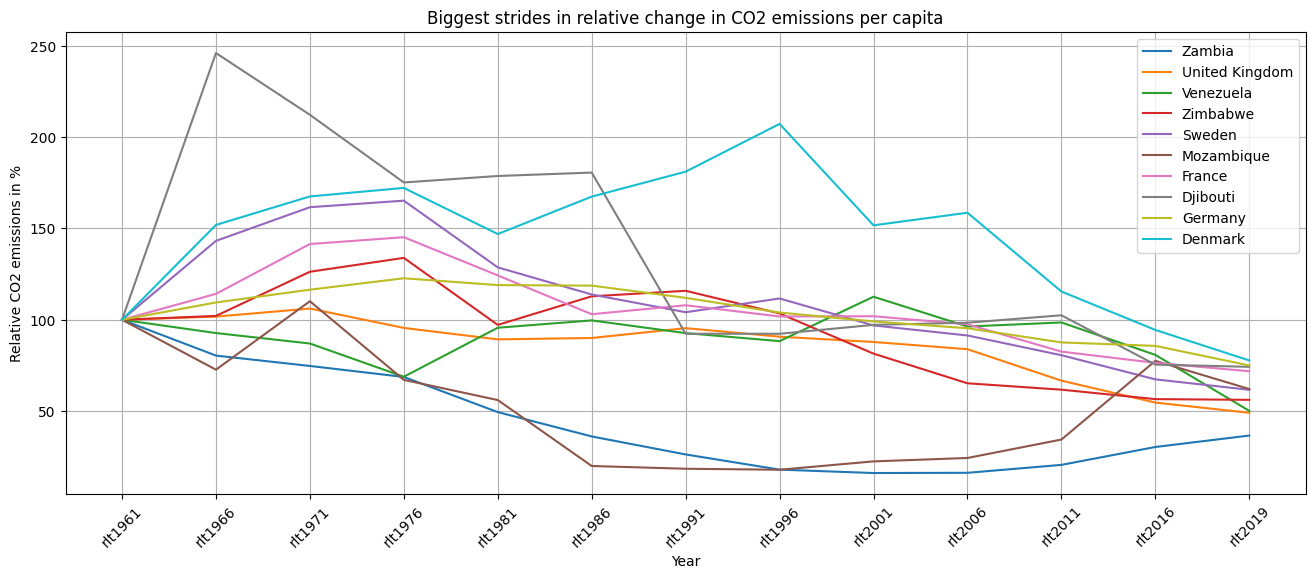



********************************************************************************
End of question N2
********************************************************************************


In [ ]:
# Make plot
rel_year = df_relco2.columns[0:]
df_best_10 = df_relco2.iloc[0:10]

plt.figure(figsize=(16, 6))
for index, row in df_best_10.iterrows():
  plt.plot(rel_year, row[0:], label=index)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Relative CO2 emissions in %')
plt.title('Biggest strides in relative change in CO2 emissions per capita')
plt.xticks(rotation=45)
plt.grid()
plt.show()

def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

long_separator_amount = 80
print_separator("*", long_separator_amount, f"End of question N2")



In 2016 the Paris Agreement was signed by 196 parties. "*The Paris Agreement's long-term temperature goal is to keep the rise in mean global temperature to well below 2 °C (3.6 °F) above pre-industrial levels, and preferably limit the increase to 1.5 °C (2.7 °F), recognising that this would substantially reduce the impacts of climate change. Emissions should be reduced as soon as possible and reach net-zero by the middle of the 21st century.*"(https://en.wikipedia.org/wiki/Paris_Agreement)
